# Quick Draw GAN

A Generative Adversarial Network trained of the Google Quickdraw dataset found here: https://github.com/googlecreativelab/quickdraw-dataset#preprocessed-dataset

Created in tf.keras

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow.keras as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation,Reshape
from tensorflow.keras.layers import BatchNormalization, Conv2D,Flatten, Conv2DTranspose, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,TensorBoard
from time import time

## Helper Functions

In [3]:
from helpers import get_np,imshow,get_callbacks

## Load the Data

In [4]:
inp_path = 'full_numpy_bitmap_apple.npy'
data = get_np(inp_path)
img_w,img_h = data.shape[1:3]

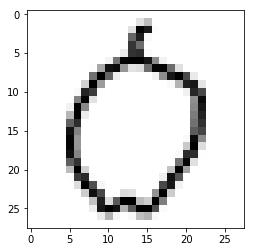

In [5]:
imshow(data,1040)

In [6]:
data.shape

(144722, 28, 28, 1)

# Discriminator

In [7]:
def discriminator_builder(width = 64,p=0.4):
    #Inputs
    inputs=  Input((img_w,img_h,1))
    
    #Model Layers
    conv1 = Conv2D(width*1,5,strides=2,padding='same',activation='relu')(inputs)
    conv1 = Dropout(p)(conv1)
    
    conv2 = Conv2D(width*2,5,strides=2,padding='same',activation='relu')(conv1)
    conv2 = Dropout(p)(conv2)
    
    conv3 = Conv2D(width*4,5,strides=2,padding='same',activation='relu')(conv2)
    conv3 = Dropout(p)(conv3)
    
    conv4 = Conv2D(width*8,5,strides=1,padding='same',activation='relu')(conv3)
    conv4 = Dropout(p)(conv4)
    conv4 = Flatten()(conv4)
    
    output = Dense(1,activation='sigmoid')(conv4)
    
    #Model Definiton
    discriminator = Model(inputs,output)
    discriminator.summary()
    return discriminator

In [8]:
discriminator = discriminator_builder()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)    

In [9]:
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(),
                      metrics = ['acc'])